# Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import anndata
import scanpy as sc
import os
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')

# Define input and output

In [2]:
overwrite = True

output_folder = r'output_folder'

################################# MANUAL INPUT #################################################
cluster_name = 'MeCP2_clustered_adata.h5ad'
labeled_name = 'MeCP2_clustered_adata_labeled.h5ad'
################################# MANUAL INPUT #################################################

#  Load Meng's data

In [3]:
from sklearn import preprocessing
#adata_mer = adata_mer

MOp_MERFISH_meng_preprocessed_for_integration_file =r"E:\MERFISH\Meng_data\counts.h5ad"

merfish_raw = sc.read_h5ad(MOp_MERFISH_meng_preprocessed_for_integration_file)

merfish_label = pd.read_csv(r"E:\MERFISH\Meng_data\cell_labels.csv", index_col=0)

merData = pd.DataFrame(merfish_raw.X, index = merfish_raw.obs.index, columns = merfish_raw.var.index)
labels = merfish_label.loc[merfish_label['label']!='-1']
merData

index                                    1700022I11Rik  1810046K07Rik  \
index                                                                   
10000143038275111136124942858811168393             0.0       0.000000   
100001798412490480358118871918100400402            0.0       0.000000   
100006878605830627922364612565348097824            0.0       0.000000   
100007228202835962319771548915451072492            0.0       0.000000   
100009332472089331948140672873134747603            0.0       0.491629   
...                                                ...            ...   
99987465505639073211021560543065098772             0.0       0.000000   
99989592830367590092304100078674096866             0.0       0.000000   
99991756591196613545069880666241120777             0.0       0.000000   
99997421766159526763299676887100858104             0.0       0.000000   
99997470167777465101376150817407669505             0.0       0.475026   

index                                    5031425F14Rik  5730522E02Rik  \
index                                                                   
10000143038275111136124942858811168393             0.0       0.000000   
100001798412490480358118871918100400402            0.0       0.000000   
100006878605830627922364612565348097824            0.0       0.000000   
100007228202835962319771548915451072492            0.0       0.000000   
100009332472089331948140672873134747603            0.0       0.983257   
...                                                ...            ...   
99987465505639073211021560543065098772             0.0       0.557620   
99989592830367590092304100078674096866             0.0       0.000000   
99991756591196613545069880666241120777             0.0       0.000000   
99997421766159526763299676887100858104             0.0       0.000000   
99997470167777465101376150817407669505             0.0       0.475026   

index                                        Acta2  Adam2   Adamts2   Adamts4  \
index                                                                           
10000143038275111136124942858811168393    0.000000    0.0  0.000000  0.000000   
100001798412490480358118871918100400402   0.000000    0.0  0.000000  0.000000   
100006878605830627922364612565348097824  25.567039    0.0  0.000000  0.000000   
100007228202835962319771548915451072492   0.000000    0.0  0.000000  0.000000   
100009332472089331948140672873134747603   0.491629    0.0  0.000000  0.000000   
...                                            ...    ...       ...       ...   
99987465505639073211021560543065098772    0.000000    0.0  0.000000  0.000000   
99989592830367590092304100078674096866    0.000000    0.0  0.000000  1.829112   
99991756591196613545069880666241120777    0.000000    0.0  0.000000  0.000000   
99997421766159526763299676887100858104    0.000000    0.0  0.000000  0.000000   
99997470167777465101376150817407669505    0.000000    0.0  0.475026  0.000000   

index                                       Adra1b       Alk  ...      Gad2  \
index                                                         ...             
10000143038275111136124942858811168393    0.659448  0.000000  ...  0.261892   
100001798412490480358118871918100400402   0.000000  0.000000  ...  0.512115   
100006878605830627922364612565348097824   0.000000  0.000000  ...  0.199059   
100007228202835962319771548915451072492   0.000000  0.000000  ...  0.240500   
100009332472089331948140672873134747603   0.983257  0.000000  ...  1.726676   
...                                            ...       ...  ...       ...   
99987465505639073211021560543065098772    0.557620  2.788098  ...  4.711612   
99989592830367590092304100078674096866   14.632893  0.000000  ...  0.354238   
99991756591196613545069880666241120777    0.000000  0.000000  ...  0.944207   
99997421766159526763299676887100858104    2.795264  0.000000  ...  0.581056   
99997470167777465101376150817407669505    0.000000  0.000000  ...  3.059676   

index             

In [4]:
# merge dataframes
merCluster=merData.merge(labels, how='inner', left_index=True, right_index=True)
merCluster.shape

merCluster

1700022I11Rik  1810046K07Rik  \
index                                                                   
10000143038275111136124942858811168393             0.0       0.000000   
100001798412490480358118871918100400402            0.0       0.000000   
100006878605830627922364612565348097824            0.0       0.000000   
100007228202835962319771548915451072492            0.0       0.000000   
100009332472089331948140672873134747603            0.0       0.491629   
...                                                ...            ...   
99987465505639073211021560543065098772             0.0       0.000000   
99989592830367590092304100078674096866             0.0       0.000000   
99991756591196613545069880666241120777             0.0       0.000000   
99997421766159526763299676887100858104             0.0       0.000000   
99997470167777465101376150817407669505             0.0       0.475026   

                                         5031425F14Rik  5730522E02Rik  \
index                                                                   
10000143038275111136124942858811168393             0.0       0.000000   
100001798412490480358118871918100400402            0.0       0.000000   
100006878605830627922364612565348097824            0.0       0.000000   
100007228202835962319771548915451072492            0.0       0.000000   
100009332472089331948140672873134747603            0.0       0.983257   
...                                                ...            ...   
99987465505639073211021560543065098772             0.0       0.557620   
99989592830367590092304100078674096866             0.0       0.000000   
99991756591196613545069880666241120777             0.0       0.000000   
99997421766159526763299676887100858104             0.0       0.000000   
99997470167777465101376150817407669505             0.0       0.475026   

                                             Acta2  Adam2   Adamts2   Adamts4  \
index                                                                           
10000143038275111136124942858811168393    0.000000    0.0  0.000000  0.000000   
100001798412490480358118871918100400402   0.000000    0.0  0.000000  0.000000   
100006878605830627922364612565348097824  25.567039    0.0  0.000000  0.000000   
100007228202835962319771548915451072492   0.000000    0.0  0.000000  0.000000   
100009332472089331948140672873134747603   0.491629    0.0  0.000000  0.000000   
...                                            ...    ...       ...       ...   
99987465505639073211021560543065098772    0.000000    0.0  0.000000  0.000000   
99989592830367590092304100078674096866    0.000000    0.0  0.000000  1.829112   
99991756591196613545069880666241120777    0.000000    0.0  0.000000  0.000000   
99997421766159526763299676887100858104    0.000000    0.0  0.000000  0.000000   
99997470167777465101376150817407669505    0.000000    0.0  0.475026  0.000000   

                                            Adra1b       Alk  ...       Sst  \
index                                                         ...             
10000143038275111136124942858811168393    0.659448  0.000000  ...  0.079685   
100001798412490480358118871918100400402   0.000000  0.000000  ...  0.171461   
100006878605830627922364612565348097824   0.000000  0.000000  ...  0.051351   
100007228202835962319771548915451072492   0.000000  0.000000  ...  0.011399   
100009332472089331948140672873134747603   0.983257  0.000000  ...  0.748264   
...                                            ...       ...  ...       ...   
99987465505639073211021560543065098772    0.557620  2.788098  ...  0.195306   
99989592830367590092304100078674096866   14.632893  0.000000  ...  0.000000   
99991756591196613545069880666241120777    0.000000  0.000000  ...  0.110999   
99997421766159526763299676887100858104    2.795264  0.000000  ...  0.000000   
99997470167777465101376150817407669505    0.000000  0.000000  ...  0.000000   

                                            Rab3b    Slc17a

In [5]:
# Scale variable measurements for model training
merGroupedDataZ = pd.DataFrame(preprocessing.scale(merCluster.iloc[:,:-5]),index = merCluster.iloc[:,:-5].index, columns = merCluster.iloc[:,:-5].columns)

merGroupedDataZ['subclass'] = merCluster.iloc[:,-2]

C:\Users\cosmosyw\anaconda3\envs\merlin_postanalysis\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\cosmosyw\anaconda3\envs\merlin_postanalysis\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [6]:
adata_ref = merGroupedDataZ

np.unique(adata_ref['subclass'])

array(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Micro', 'OPC',
       'Oligo', 'PVM', 'Peri', 'Pvalb', 'SMC', 'Sncg', 'Sst', 'VLMC',
       'Vip', 'other'], dtype=object)

In [7]:
# combine the endo cells
defined_mapper = {'SMC':'SMC-VLMC', 'VLMC':'SMC-VLMC', 'Endo':'Endo-PVM', 'PVM':'Endo-PVM'}
all_mapper = {}
for subcls in np.unique(adata_ref['subclass']):
    if subcls in defined_mapper.keys():
        all_mapper[subcls] = defined_mapper[subcls]
    else:
        all_mapper[subcls] = subcls

adata_ref['subclass'] = adata_ref['subclass'].apply(lambda x: all_mapper[x])
np.unique(adata_ref['subclass'])

array(['Astro', 'Endo-PVM', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT',
       'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Micro',
       'OPC', 'Oligo', 'Peri', 'Pvalb', 'SMC-VLMC', 'Sncg', 'Sst', 'Vip',
       'other'], dtype=object)

# Load our dataset

In [8]:
adata_query= sc.read_h5ad(os.path.join(adata_folder, cluster_name))

# Train classifier

In [9]:
# Train the classifer using the shared varibales

genes_from_ref = set(merData.columns)
genes = list(genes_from_ref.intersection(set(adata_query.var.index)))


# Train a classifier
gene_ids = [merData.columns.get_loc(g) for g in genes]

print('Train cell type classifier.')

X = np.array(adata_ref.iloc[:,:-1])[:, gene_ids]
Y = np.array(adata_ref['subclass'])
nnc = MLPClassifier(max_iter = 500)
nnc.fit(X, Y)

Train cell type classifier.


MLPClassifier(max_iter=500)

# Predict

In [11]:
# Sorting code from Meng

from random import choice

def permuteOrder(df,axis,switch = 0):
    penaltyMat = np.zeros((df.shape[0],df.shape[1]))
    for i in range(penaltyMat.shape[0]):
        for j in range(penaltyMat.shape[1]):
            penaltyMat[i,j] = np.abs(i-(df.shape[0])/(df.shape[1])*j)**0.5
    if axis == 0:
        sort = df.index.values.copy()
    elif axis == 1:
        sort = df.columns.values.copy()
    dfCopy = df.values.copy()
#     print(dfCopy)
    for i in range(df.shape[int(axis)]):
        penalty = np.full((df.shape[int(axis)]),np.inf)
        for j in range(len(penalty)):
            tempMat = dfCopy.copy()
            if axis == 0:
                tempMat[[i, j],:] = tempMat[[j, i],:]
            elif axis == 1:
                tempMat[:,[i, j]] = tempMat[:,[j, i]]
            penalty[j] = sum(sum(tempMat*penaltyMat))
        idx = np.argmin(penalty)
        if not idx == i:                
            switch += 1
        if axis == 0:
            dfCopy[[i, idx], :] = dfCopy[[idx, i], :];
        elif axis == 1:
            dfCopy[:,[i, idx]] = dfCopy[:,[idx, i]];
        else:
            print('bad axis {}'.format(axis))
        sort[[i, idx]] = sort[[idx, i]]
    return switch,sort

def runPermutation(df, axis = 'Both', maxIter = 100,maxTrys = 9):  # initial maxTrys = 5
    iterations = 0
    trys = 0
    sortedDF = df.copy(deep=True)
    while iterations < maxIter:
        if axis == 'Both':
            switch,rowSort = permuteOrder(sortedDF,0)
            sortedDF = sortedDF.loc[rowSort,:].copy(deep=True)
            switch,columnSort = permuteOrder(sortedDF,1,switch)
            sortedDF = sortedDF.loc[:,columnSort].copy(deep=True)
            iterations += 1
            if switch == 0 and trys < maxTrys:
                currentIndex = np.array(range(len(sortedDF.index.values)))
                currentCol = np.array(range(len(sortedDF.columns.values)))
                in1 = choice(currentIndex)
                in2 = choice(currentIndex)
                if len(currentIndex)>1:
                    while in1 == in2:
                        in2 = choice(currentIndex)
                currentIndex[[in1,in2]] = currentIndex[[in2,in1]]
                in1 = choice(currentCol)
                in2 = choice(currentCol)
                if len(currentCol)>1:
                    while in1 == in2:
                        in2 = choice(currentCol)
                currentCol[[in1,in2]] = currentCol[[in2,in1]]
                sortedDF = sortedDF.iloc[currentIndex,currentCol].copy(deep=True)
                trys += 1
            elif switch == 0 and trys == maxTrys:
                iterations = maxIter
        if axis == 'Rows':
            switch,rowSort = permuteOrder(sortedDF,0)
            sortedDF = sortedDF.loc[rowSort,:].copy(deep=True)
            iterations += 1
            if switch == 0 and trys < maxTrys:
                currentIndex = np.array(range(len(sortedDF.index.values)))
                in1 = choice(currentIndex)
                in2 = choice(currentIndex)
                if len(currentIndex)>1:
                    while in1 == in2:
                        in2 = choice(currentIndex)
                currentIndex[[in1,in2]] = currentIndex[[in2,in1]]
                sortedDF = sortedDF.iloc[currentIndex,:].copy(deep=True)
                trys += 1
            elif switch == 0 and trys == maxTrys:
                 iterations = maxIter
        if axis == 'Columns':
            switch,columnSort = permuteOrder(sortedDF,1)
            sortedDF = sortedDF.loc[:,columnSort].copy(deep=True)
            iterations += 1
            if switch == 0 and trys < maxTrys:
                currentCol = np.array(range(len(sortedDF.columns.values)))
                in1 = choice(currentCol)
                in2 = choice(currentCol)
                if len(currentCol)>1:
                    while in1 == in2:
                        in2 = choice(currentCol)
                currentCol[[in1,in2]] = currentCol[[in2,in1]]
                sortedDF = sortedDF.iloc[:,currentCol].copy(deep=True)
                trys += 1
            elif switch == 0 and trys == maxTrys:
                iterations = maxIter
    return sortedDF, sortedDF.index, sortedDF.columns

In [12]:
def predict_classes(classifier, adata, prediction_column, genes):
    '''Predict the classes of cells using a trained classifier.'''
    gene_ids = [adata.var.index.get_loc(g) for g in genes]
    X = adata.X[:, gene_ids]
    adata.obs[prediction_column] = classifier.predict(X)
    
def plot_cluster_correspondance(adata_ref, adata_query, ref_cluster_column, query_cluster_column,
                                prediction_column='predicted_classes', genes=None):
    '''Plot the correspondance between clusters from two data sets.'''
    # Make a copy of the query data set

    adata_query = adata_query.copy()
    
    # Use the shared genes for predictions if the gene set is not specified
    if genes is None:
        genes = list(set(adata_ref.var.index).intersection(set(adata_query.var.index)))
        
    # Train a classifier
    print(f'Train a classifier using {len(genes)} genes and {adata_ref.shape[0]} cells.')
    nnc = train_nn_gene_exp_classifier(adata_ref, ref_cluster_column, genes)
    

        
    
    # Make predictions
    print('Predict cell types.')
    predict_classes(nnc, adata_query, prediction_column, genes)
    
    # Count predictions
    prediction_counts = adata_query.obs[[query_cluster_column, prediction_column]]
    prediction_counts['count'] = 1
    
    predictionMatrix = pd.pivot_table(prediction_counts, index=[query_cluster_column],
               columns=[prediction_column], values='count', aggfunc=np.sum).fillna(0)
    predictionMatrix['total'] = predictionMatrix.sum(axis = 1)
    fractions = predictionMatrix.iloc[:,:-1].div(predictionMatrix['total'],axis = 0)
    
    #fractions_sorted, rows, columns = runPermutation(fractions,'Columns')
    fractions_sorted, rows, columns = runPermutation(fractions,'Both')
    
    # Plot
    fig1=plt.figure(figsize = (10,9))
    sns.set(font_scale=0.3)
    #sns.heatmap(fractions_sorted, cmap='Greys', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
    sns.heatmap(fractions_sorted, cmap='Reds', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
    
    plt.xlabel(ref_cluster_column) 
    plt.ylabel(query_cluster_column)
    plt.show()
    
    return fractions_sorted

Predict cell types.


C:\Users\cosmosyw\AppData\Local\Temp\ipykernel_2600\2557171540.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_counts['count'] = 1


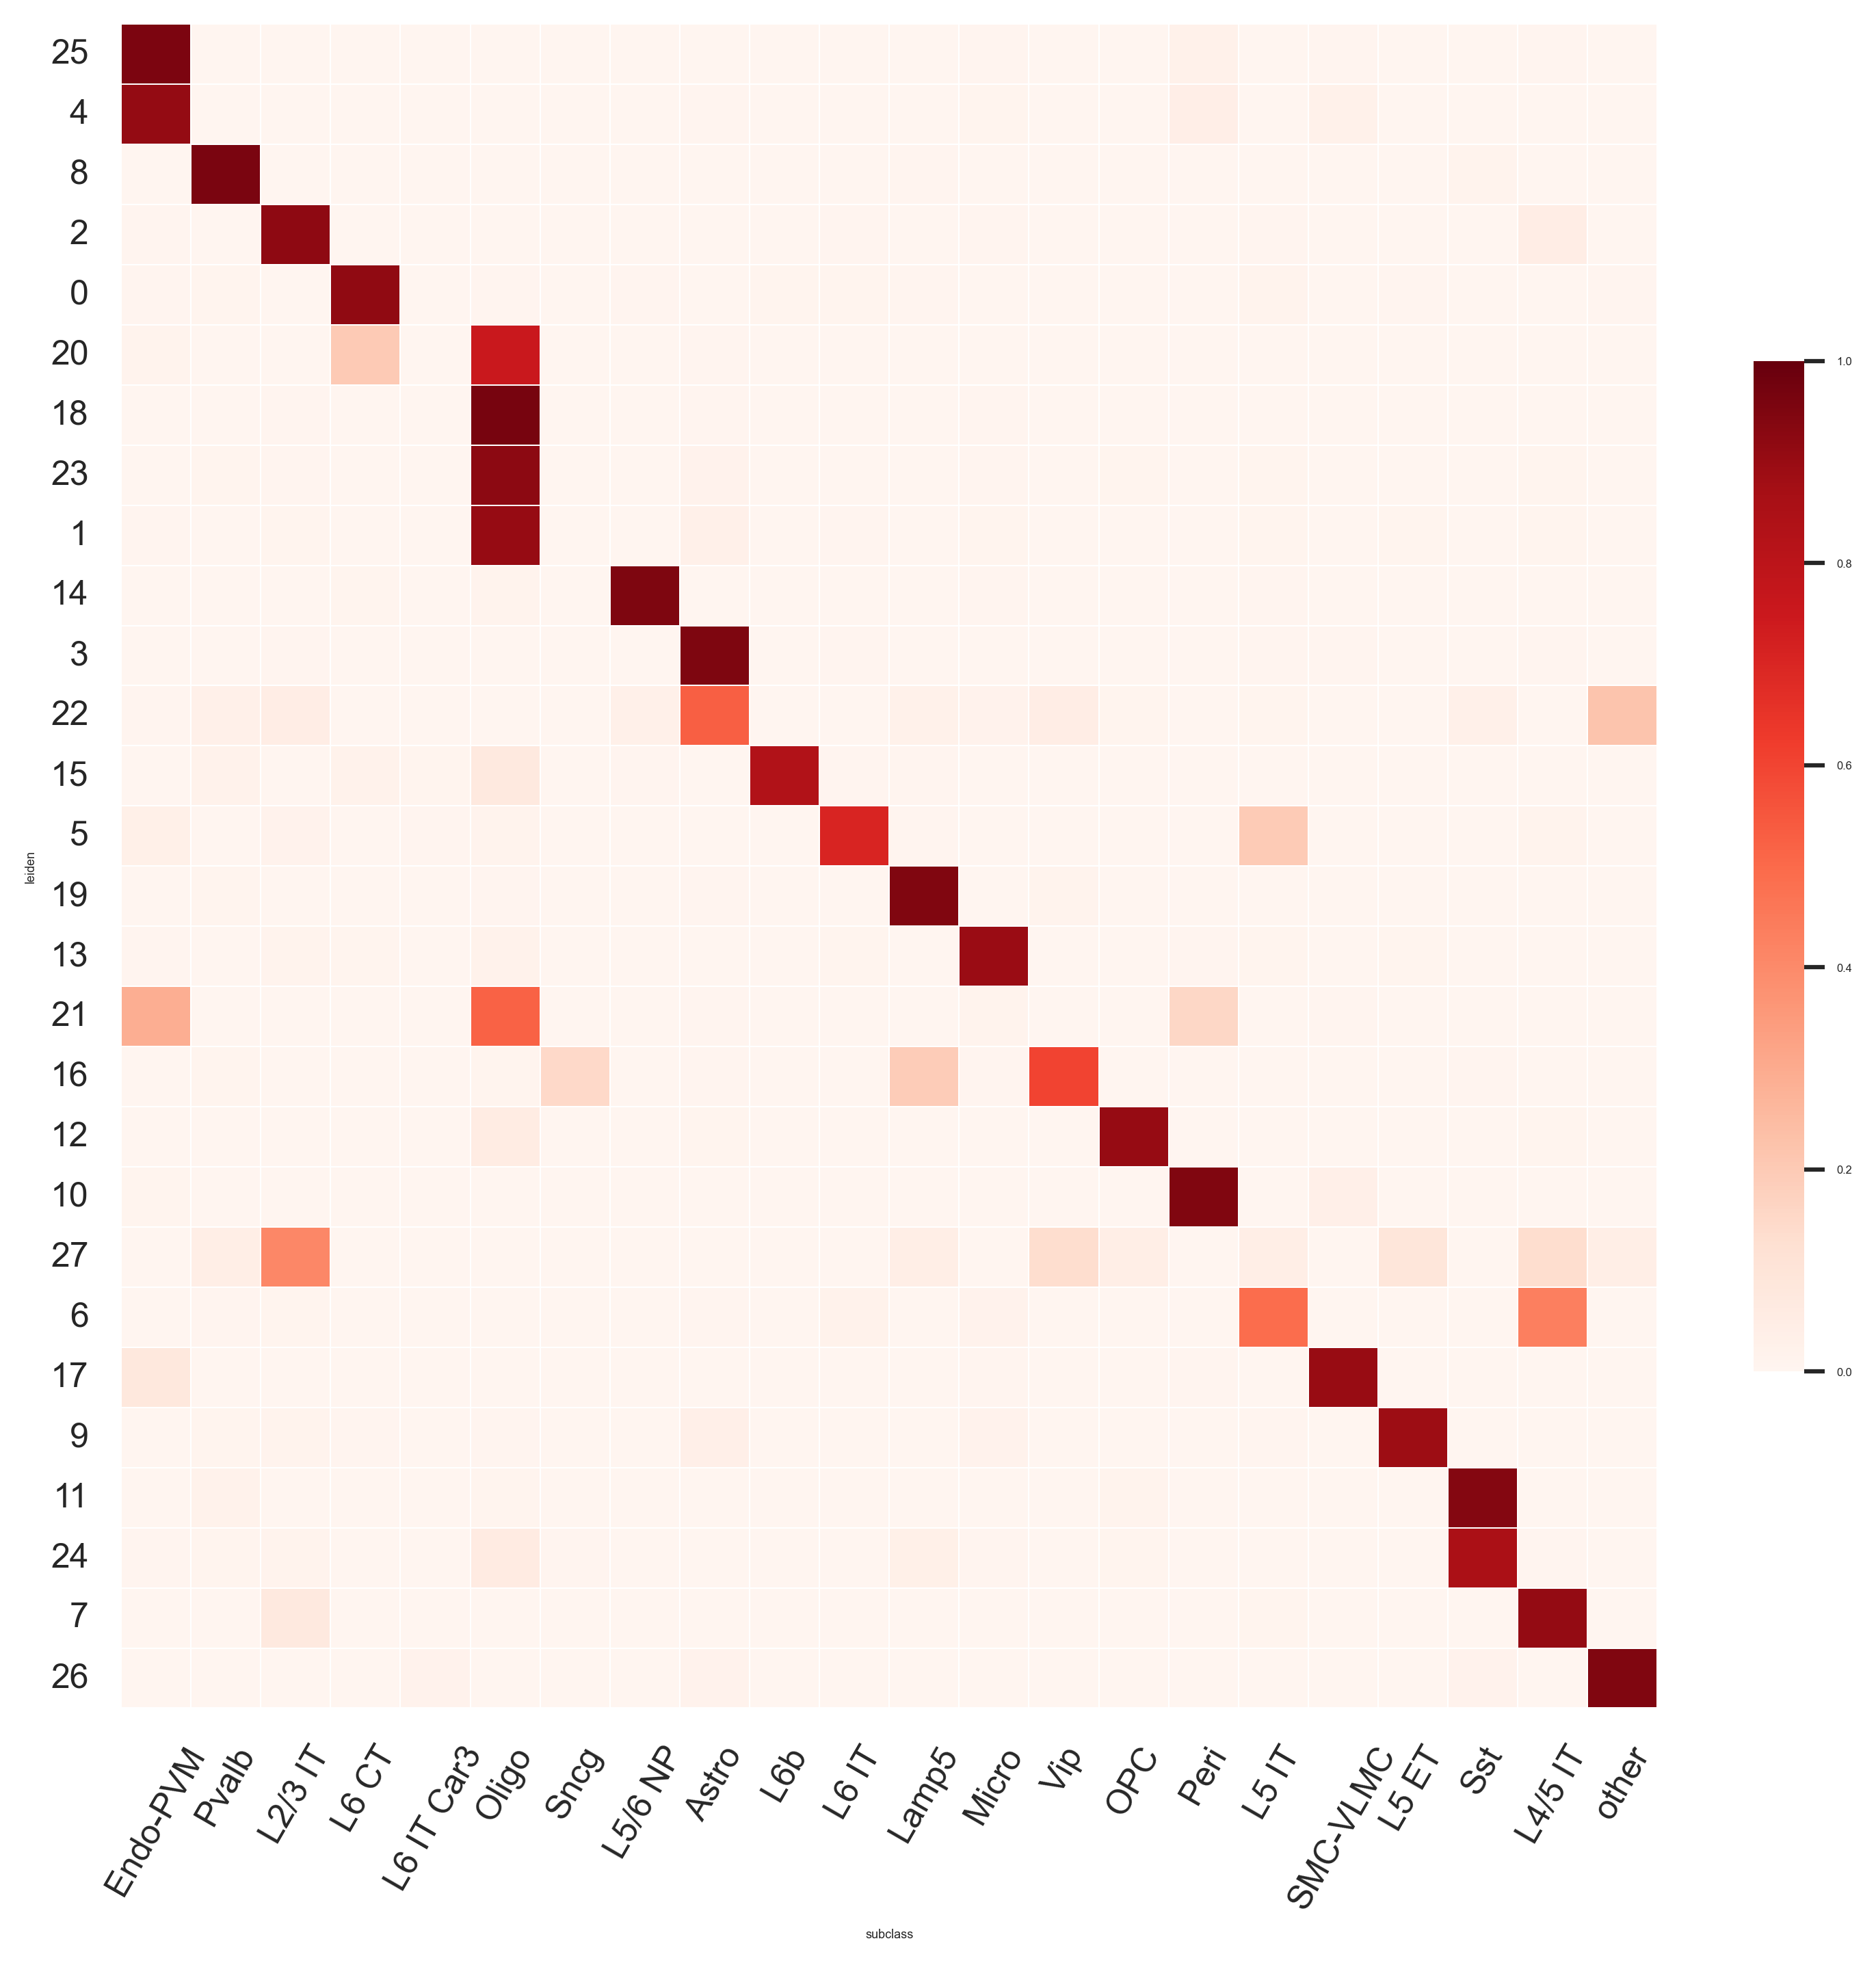

In [13]:
prediction_column = 'subclass_prediction_label'

ref_cluster_column = 'subclass'

query_cluster_column = 'leiden'


print('Predict cell types.')
predict_classes(nnc, adata_query, prediction_column, genes)
    
# Count predictions
prediction_counts = adata_query.obs[[query_cluster_column, prediction_column]]
prediction_counts['count'] = 1
    
predictionMatrix = pd.pivot_table(prediction_counts, index=[query_cluster_column],
               columns=[prediction_column], values='count', aggfunc=np.sum).fillna(0)

predictionMatrix['total'] = predictionMatrix.sum(axis = 1)
    
fractions = predictionMatrix.iloc[:,:-1].div(predictionMatrix['total'],axis = 0)
    
#fractions_sorted, rows, columns = runPermutation(fractions,'Columns')
fractions_sorted, rows, columns = runPermutation(fractions,'Both')
    
# Plot
fig1=plt.figure(figsize = (10,9))
sns.set(font_scale=0.3)
#sns.heatmap(fractions_sorted, cmap='Greys', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
sns.heatmap(fractions_sorted, cmap='Reds', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)   
plt.xticks(rotation = 60)
plt.yticks(rotation = 'horizontal')
plt.xlabel(ref_cluster_column) 
plt.ylabel(query_cluster_column)
plt.show()

# Merge and manually label clusters

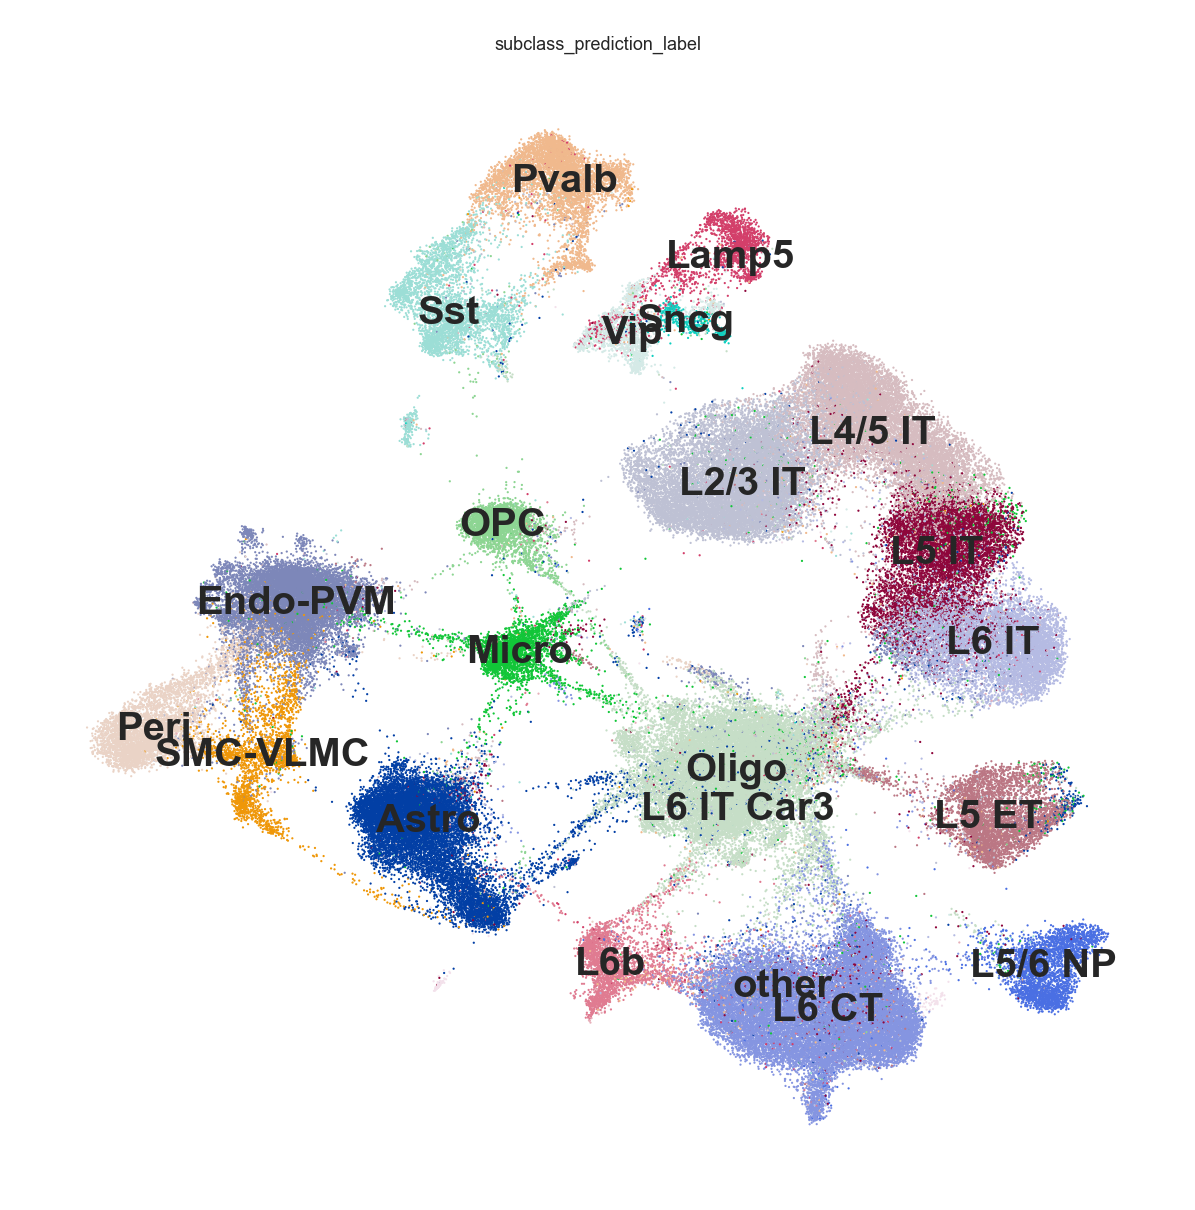

In [14]:
# Plot the predicted labels on UMAP to guide the manual labeling of the de novo clustering below
# use this to manually merge and split the original query column (e.g., leiden_subclass)
sc.pl.umap(adata_query, color='subclass_prediction_label', legend_loc='on data',legend_fontsize=8)

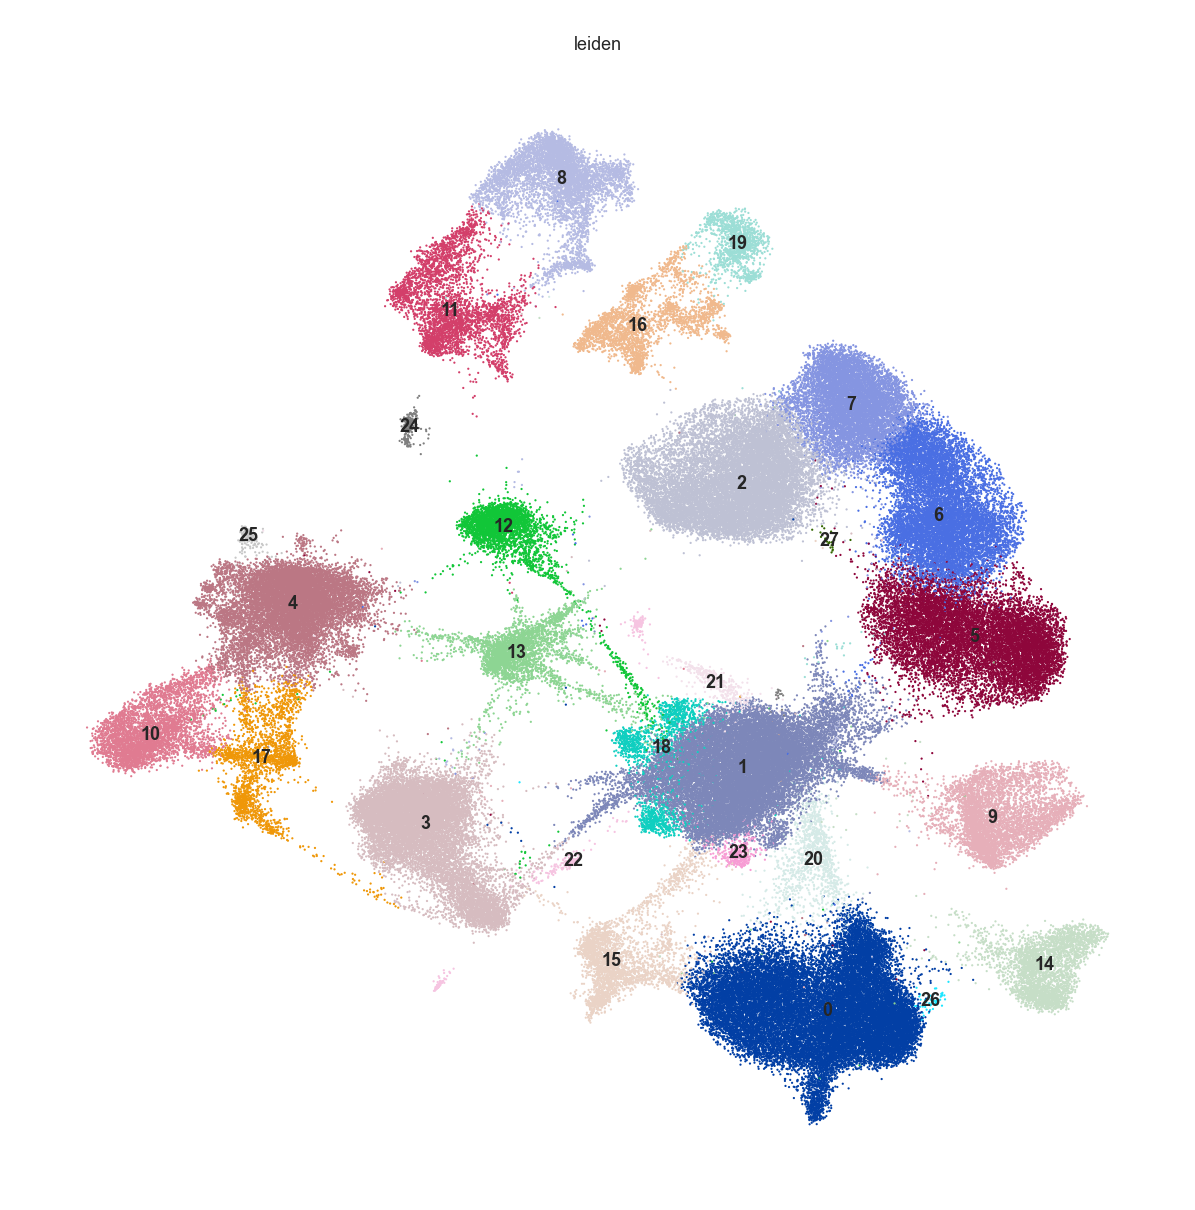

CPU times: total: 656 ms
Wall time: 667 ms


In [15]:
%%time

# Compare to the prediction above to find de novo clusters of interest to split or merge

sc.pl.umap(adata_query, color='leiden', legend_loc='on data')

In [16]:
adata_query.obs['leiden_subclass_sub'] = adata_query.obs['leiden'] 

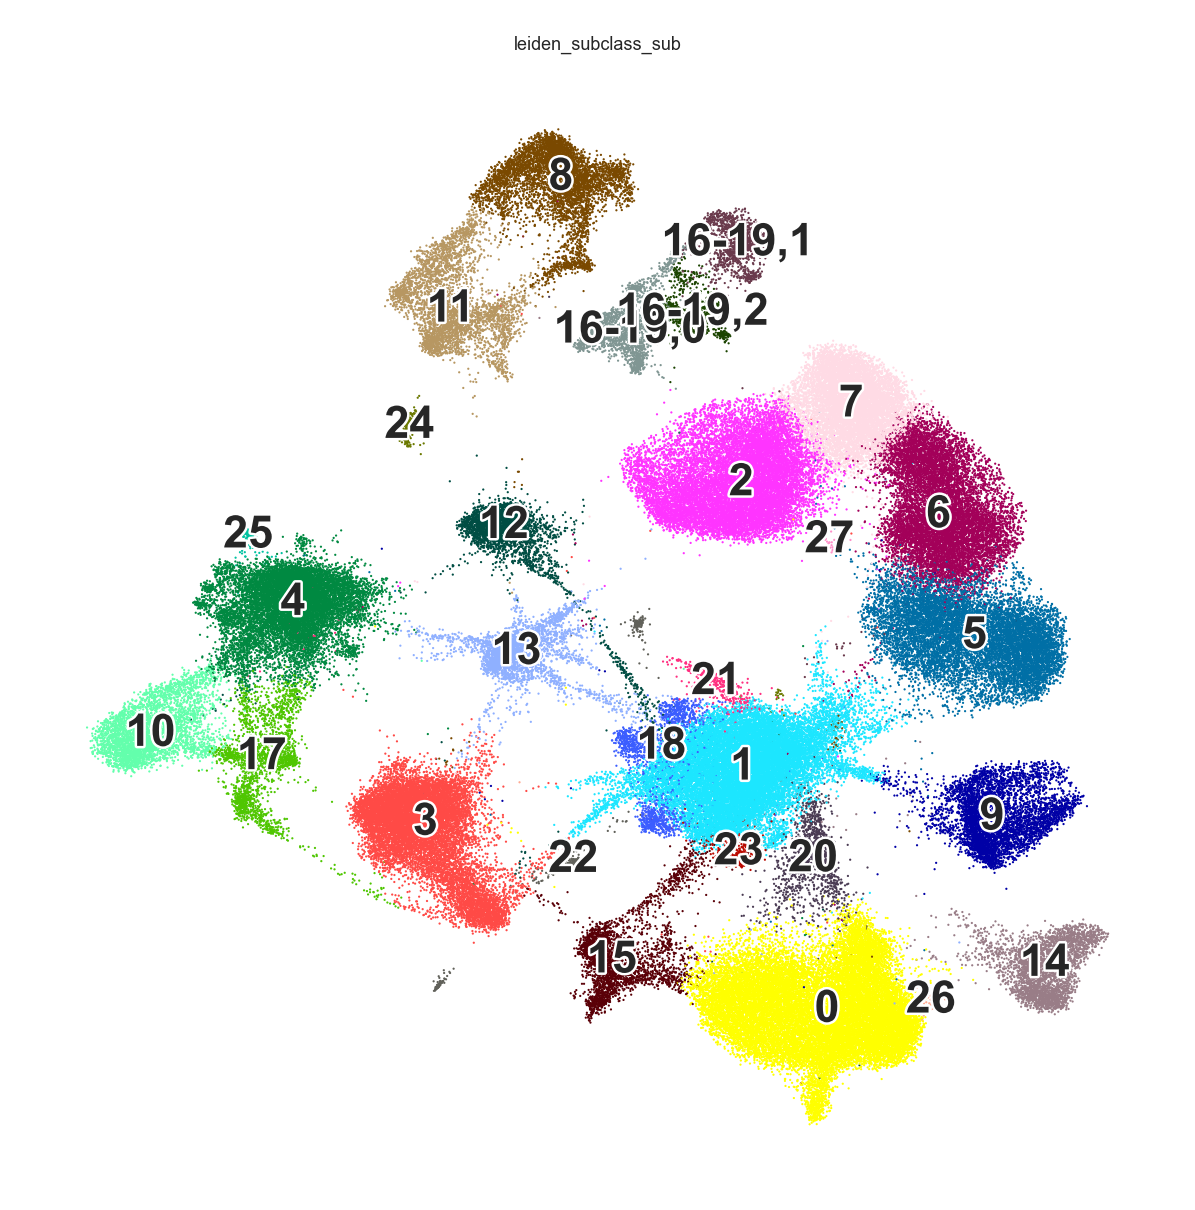

CPU times: total: 5min 1s
Wall time: 1min 12s


In [17]:
%%time
# sub-split the cluster 16, 19 to obtain Sncg, Vip, Lamp5
# adjust resolution to test (use small value to avoid oversplit)
sc.tl.leiden(adata_query, resolution=0.1,restrict_to=('leiden_subclass_sub',['16', '19']),
           key_added='leiden_subclass_sub')

sc.tl.umap(adata_query)
# Plot the UMAP
sc.pl.umap(adata_query, color='leiden_subclass_sub', legend_loc='on data',legend_fontsize=9,legend_fontoutline=1)

In [18]:
# duplicate the column for manual labeling of the final clustering
adata_query.obs['subclass_manual_label'] = adata_query.obs['leiden_subclass_sub'] 

In [19]:
# manual assign labels

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'16-19,1':'Lamp5'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'16-19,0':'Vip'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'16-19,2':'Sncg'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'11':'Sst','24':'Sst'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'8':'Pvalb'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'2':'L2/3 IT'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'7':'L4/5 IT'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'6':'L5 IT'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'5':'L6 IT'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'9':'L5 ET'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'14':'L5/6 NP'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'0':'L6 CT','26':'L6 CT'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'15':'L6b'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'3':'Astro'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'12':'OPC'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'1':'Oligo','18':'Oligo', '23':'Oligo'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'4':'Endo-PVM', '25':'Endo-PVM'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'10':'Peri'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'17':'SMC-VLMC'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'13':'Micro'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'20':'other', '21':'other', '22':'other', 
                                                                    '26':'other', '27':'other'}})

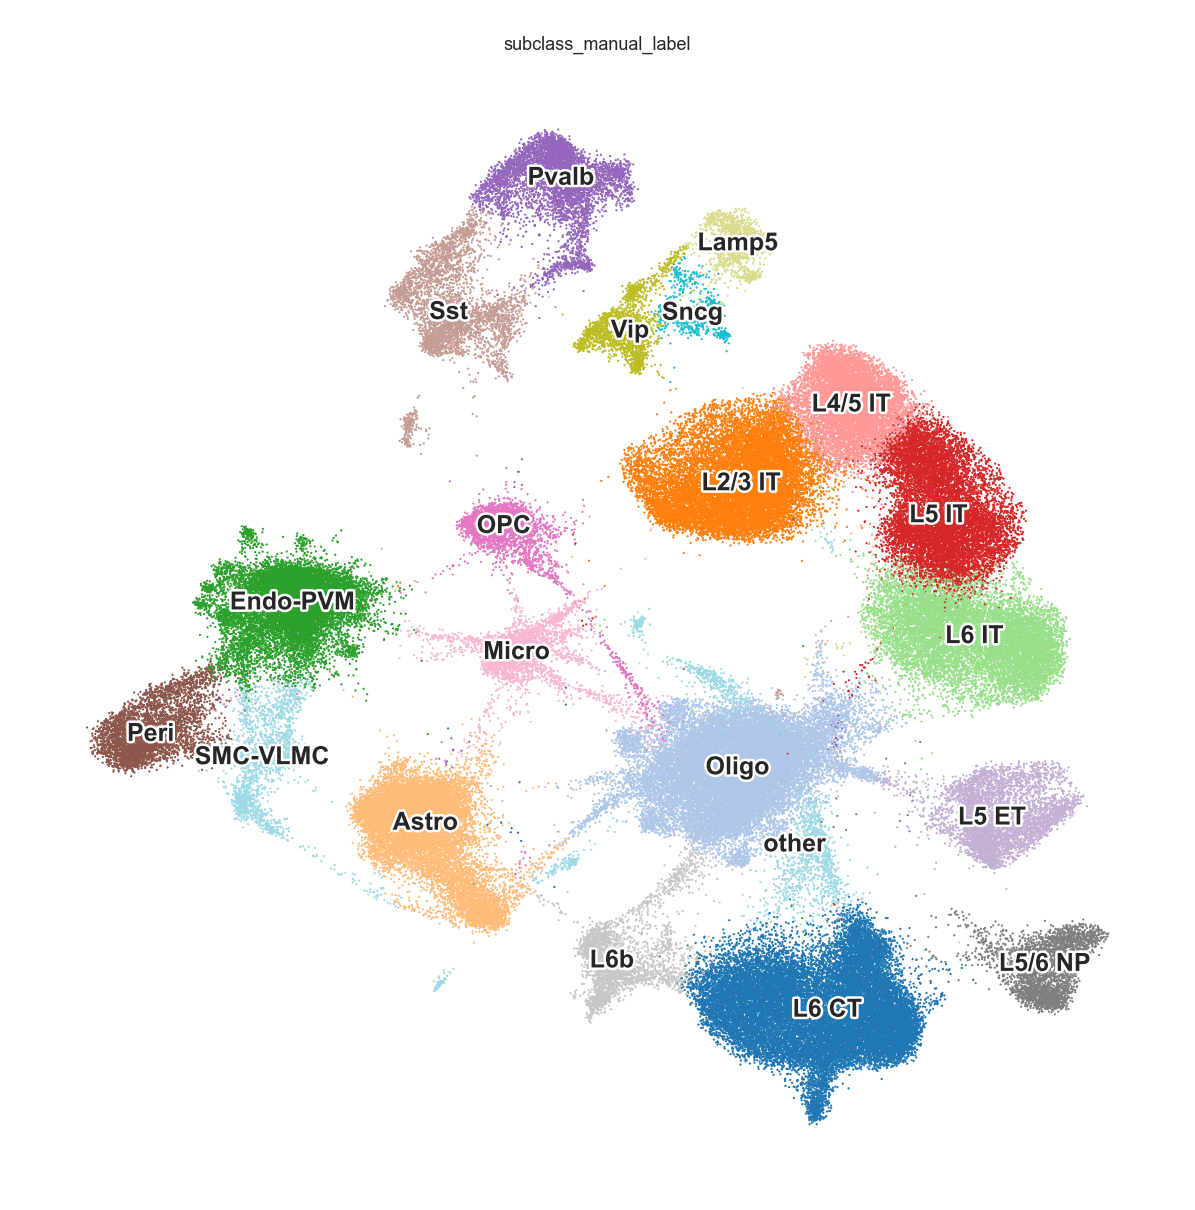

In [20]:
# Plot the manually labeled UMAP
ax = sc.pl.umap(adata_query, color='subclass_manual_label', legend_loc='on data',legend_fontsize=5,legend_fontoutline=1, palette='tab20')

# Reevaluate the clustering

Predict cell types.


C:\Users\cosmosyw\AppData\Local\Temp\ipykernel_2600\3299511188.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_counts['count'] = 1


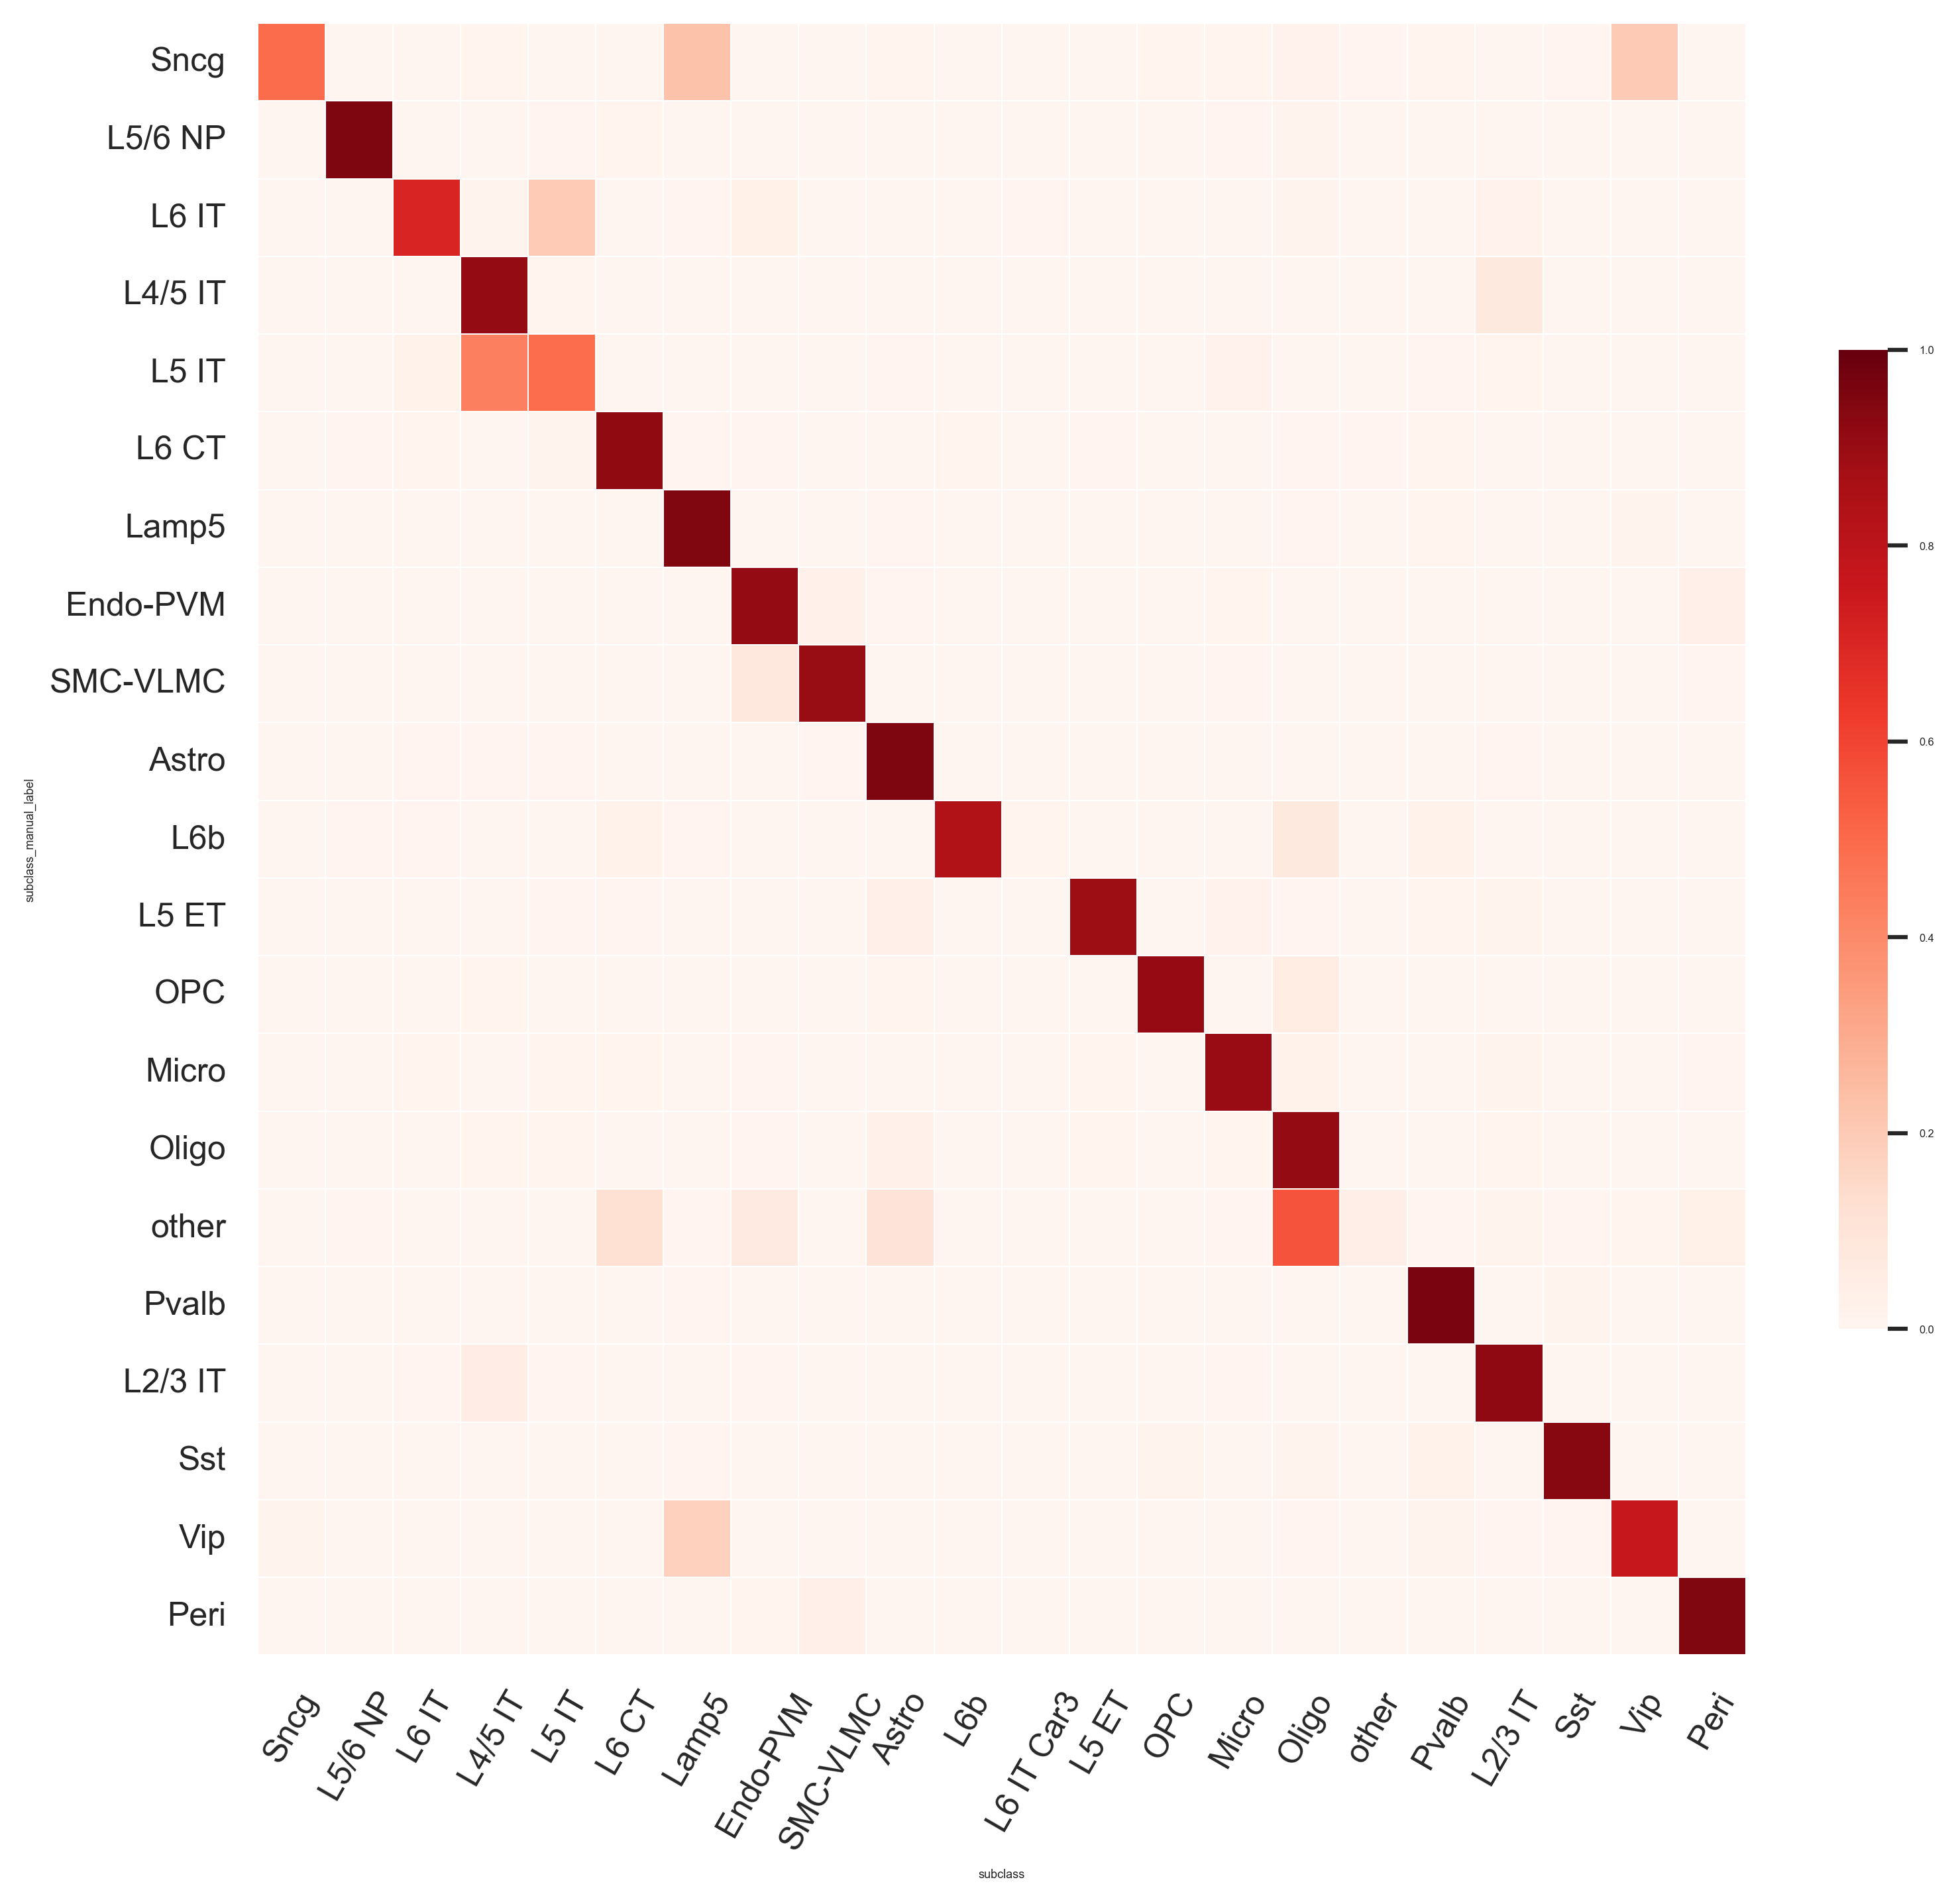

In [21]:
prediction_column = 'subclass_prediction_label_2'

ref_cluster_column = 'subclass'

#query_cluster_column = 'leiden_subclass'
query_cluster_column = 'subclass_manual_label'


print('Predict cell types.')
predict_classes(nnc, adata_query, prediction_column, genes)
    
# Count predictions
prediction_counts = adata_query.obs[[query_cluster_column, prediction_column]]
prediction_counts['count'] = 1
    
predictionMatrix = pd.pivot_table(prediction_counts, index=[query_cluster_column],
               columns=[prediction_column], values='count', aggfunc=np.sum).fillna(0)

predictionMatrix['total'] = predictionMatrix.sum(axis = 1)
    
fractions = predictionMatrix.iloc[:,:-1].div(predictionMatrix['total'],axis = 0)
    
#fractions_sorted, rows, columns = runPermutation(fractions,'Columns')
fractions_sorted, rows, columns = runPermutation(fractions,'Both')
    
# Plot
fig1=plt.figure(figsize = (10,9))
sns.set(font_scale=0.3)
#sns.heatmap(fractions_sorted, cmap='Greys', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
sns.heatmap(fractions_sorted, cmap='Reds', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.xticks(rotation = 60)
plt.yticks(rotation = 'horizontal')    
    
plt.xlabel(ref_cluster_column) 
plt.ylabel(query_cluster_column)
plt.show()

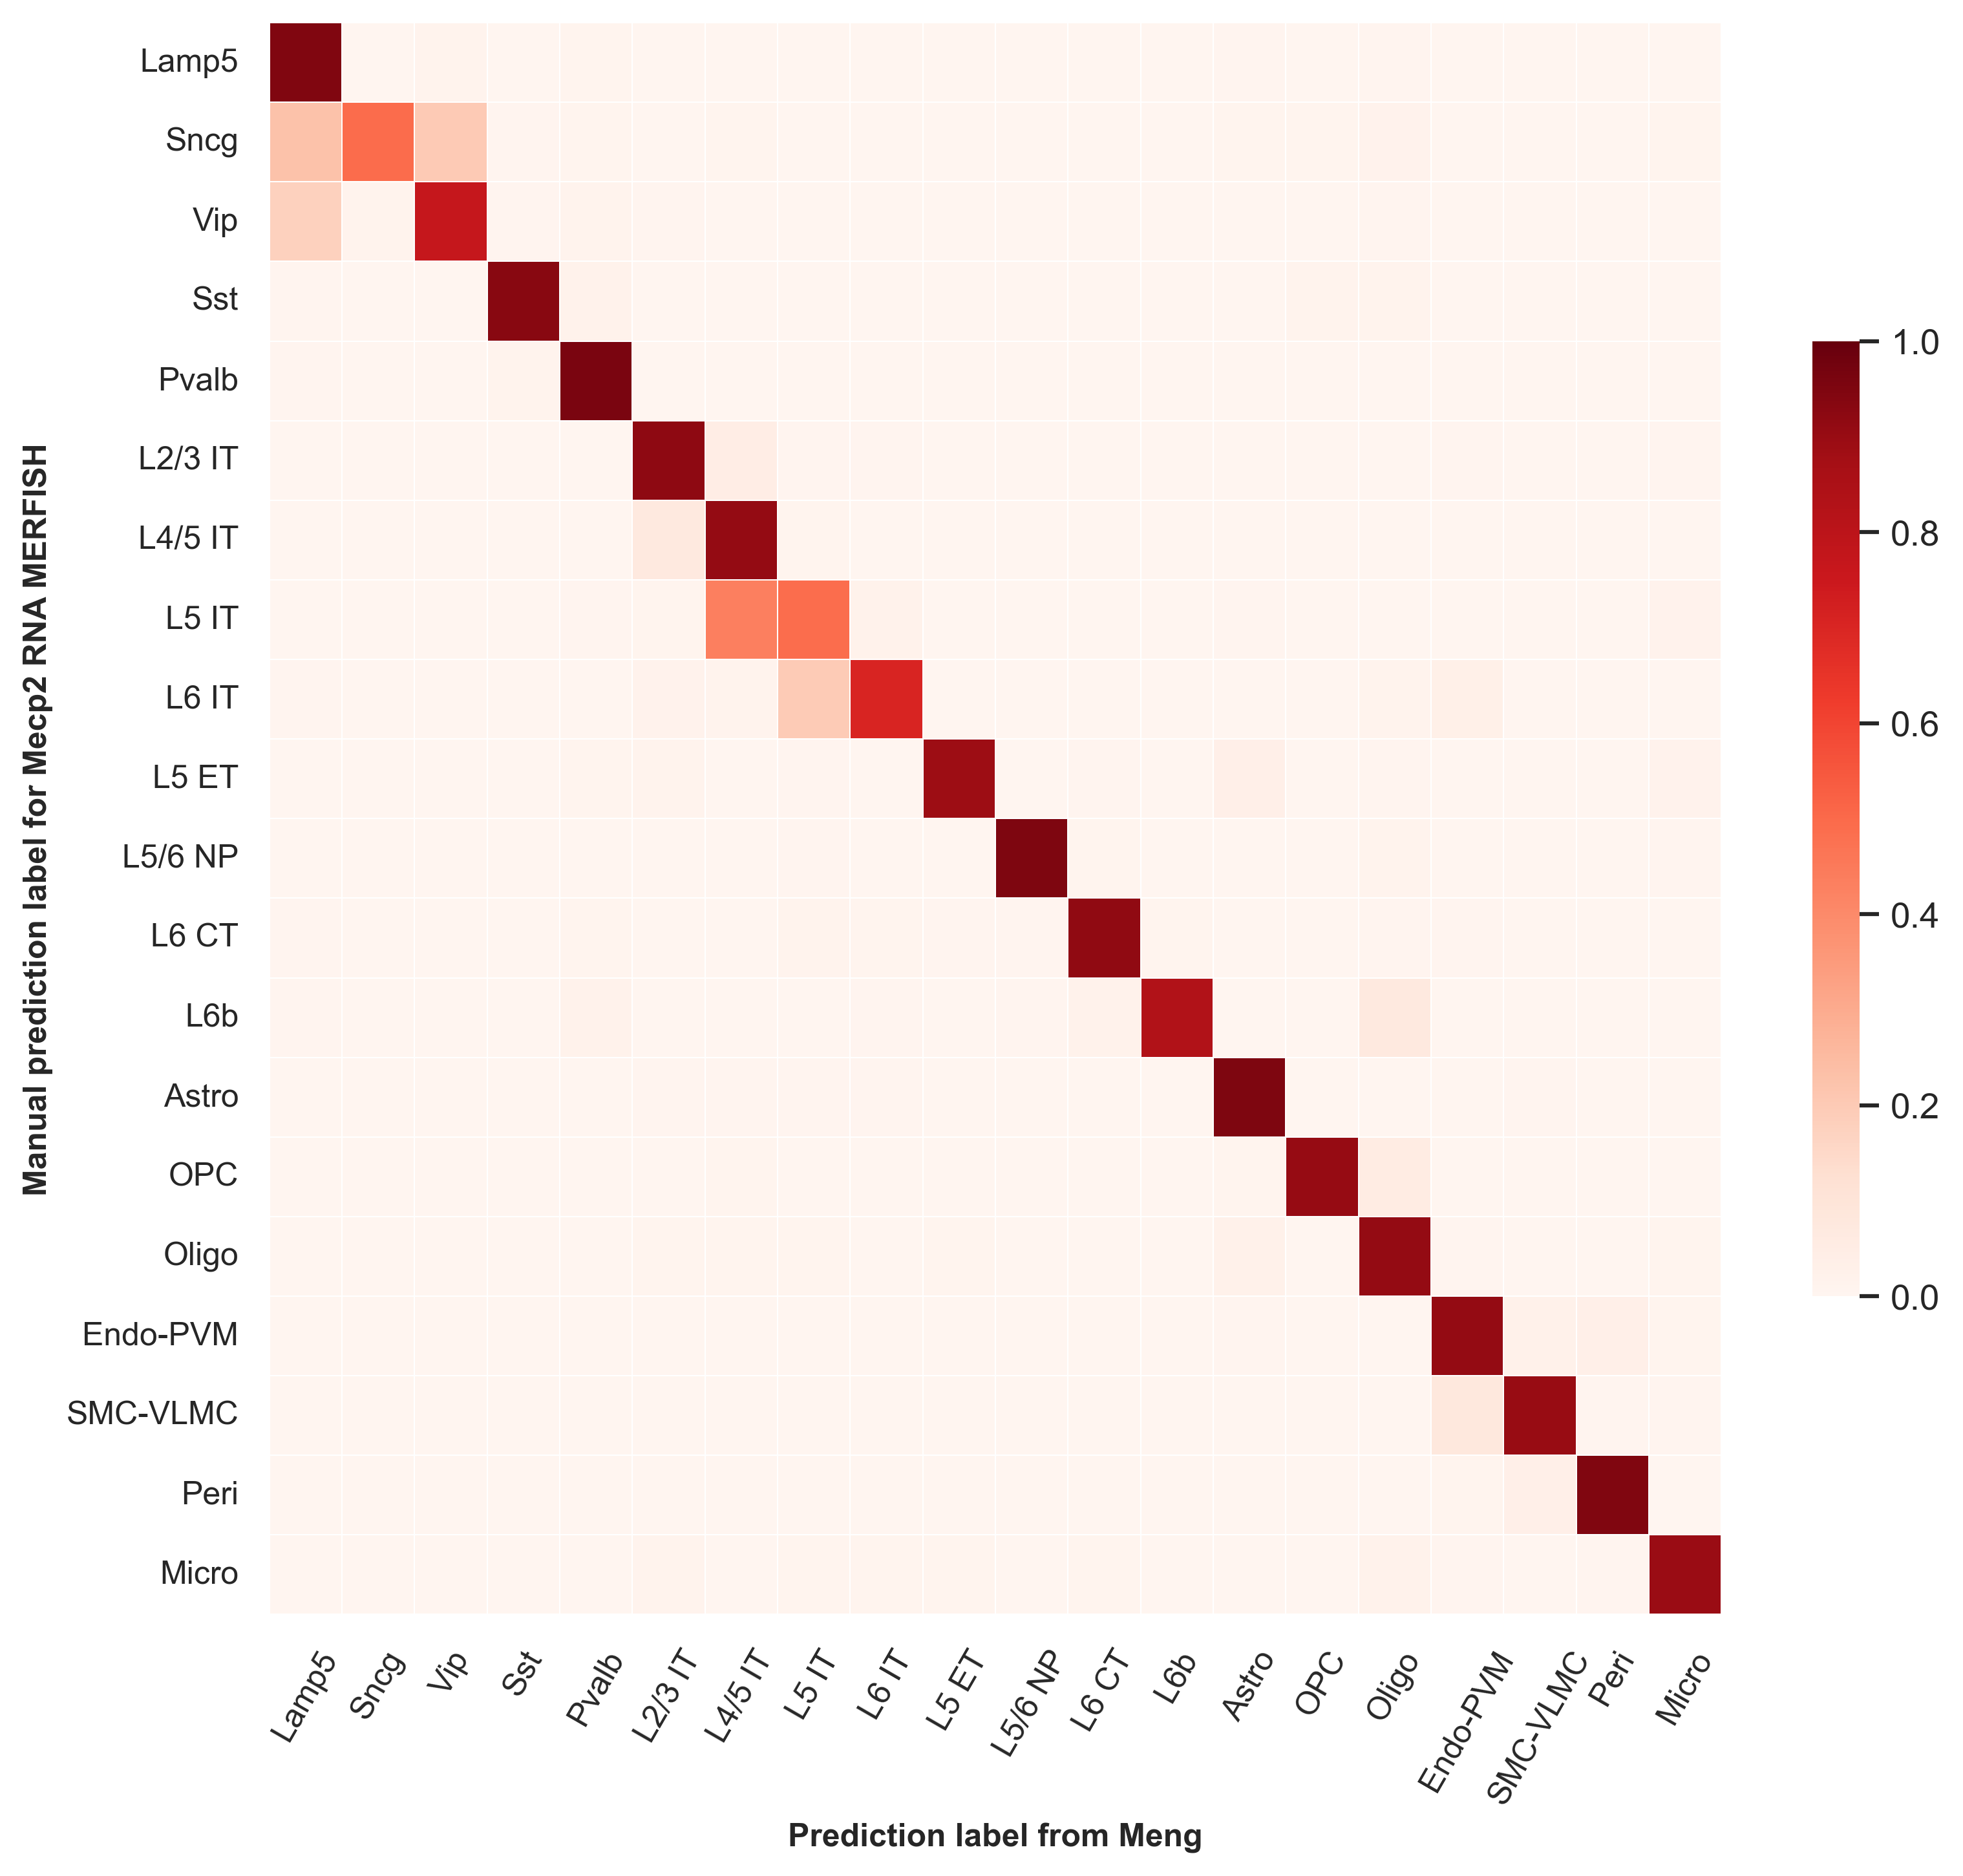

In [28]:
# sort the labels along the x-axis (optional)
sorted_predicted_labels = ['Lamp5','Sncg','Vip','Sst','Pvalb','L2/3 IT','L4/5 IT','L5 IT',
                          'L6 IT','L5 ET','L5/6 NP','L6 CT','L6b','Astro','OPC','Oligo',
                           'Endo-PVM', 'SMC-VLMC', 'Peri', 'Micro']

fractions_sorted_by_label = fractions_sorted[sorted_predicted_labels]
fractions_sorted_by_label = fractions_sorted_by_label[fractions_sorted_by_label.index.isin(sorted_predicted_labels)].copy()

sorted_coor_df, rows, columns = runPermutation(fractions_sorted_by_label,'Rows',maxIter = 100,maxTrys = 15)

manual_coor_df = sorted_coor_df


_plot = True
if _plot:
   # Plot
    fig1=plt.figure(figsize = (10,9))
    sns.set(font_scale=1)
    #sns.heatmap(fractions_sorted, cmap='Greys', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
    sns.heatmap(manual_coor_df, cmap='Reds', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    plt.xticks(rotation = 60)
    plt.yticks(rotation = 'horizontal')
    plt.xlabel(r'Prediction label from Meng', fontsize = 10, fontweight='bold') 
    plt.ylabel(r'Manual prediction label for Mecp2 RNA MERFISH', fontsize = 10, fontweight='bold')
    plt.show()

In [29]:
if overwrite:
    save_filename = os.path.join(adata_folder, labeled_name)
    adata_query.write_h5ad(save_filename)
    print ('Save the final labels.')

Save the final labels.


# Plot example

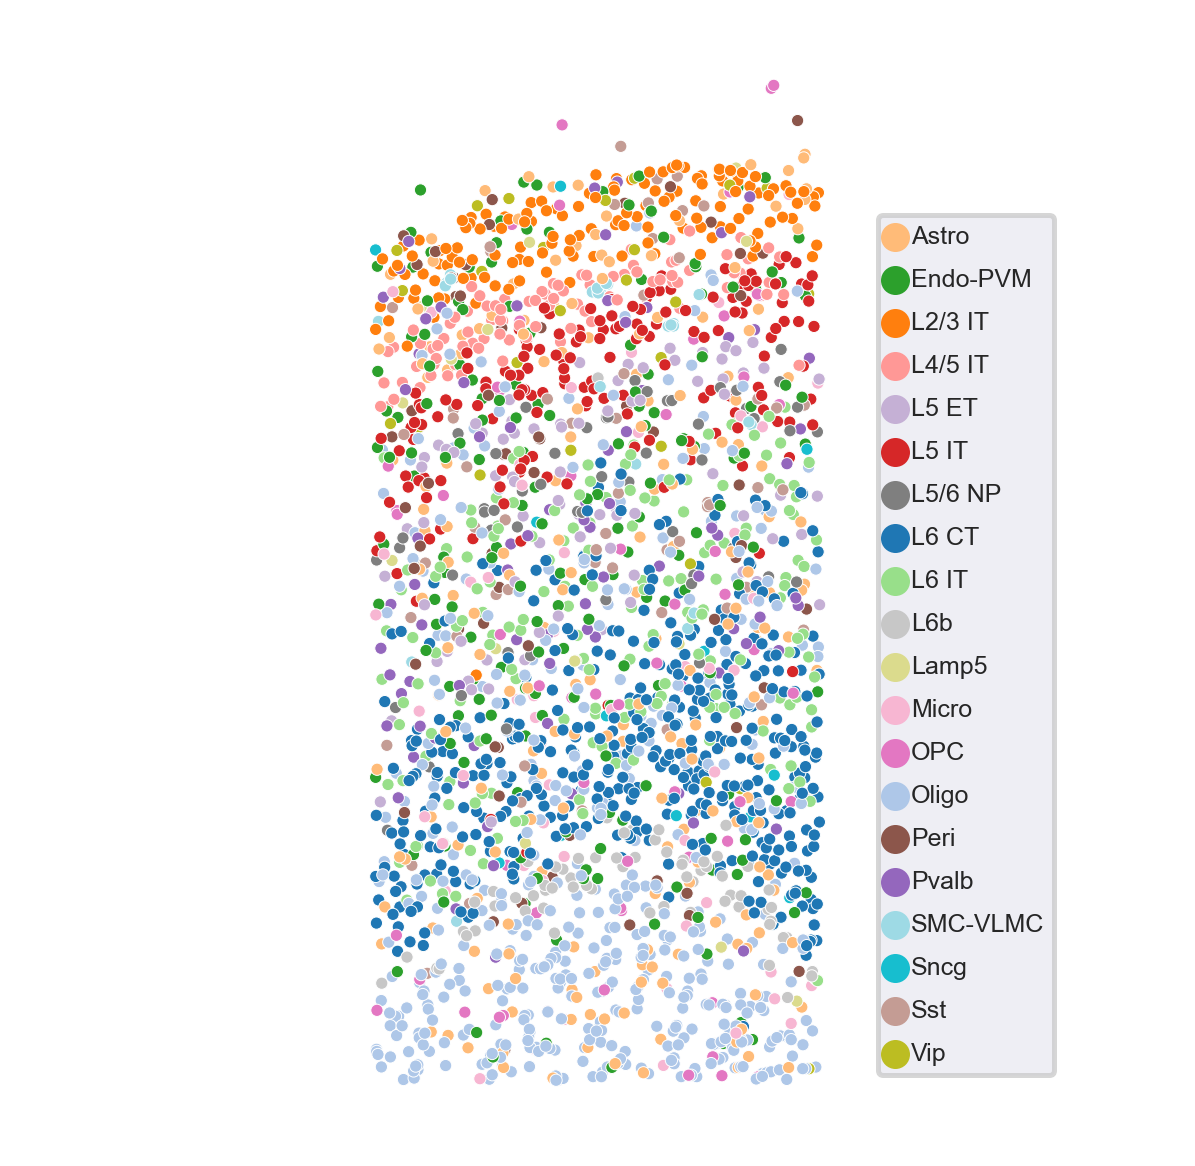

In [37]:
import matplotlib.pyplot as plt

data_small = adata_query.obs[adata_query.obs['experiment']=='1101'].copy()
data_small = data_small[data_small['subclass_manual_label']!='other'].copy()
data_small = data_small[data_small['center_x']>-6200]
data_small = data_small[data_small['center_x']<-4000]
data_small = data_small[data_small['center_y']>-300]
data_small = data_small[data_small['center_y']<500]
data_small ['center_x_rotate'] = data_small['center_y']
data_small ['center_y_rotate'] = data_small['center_x']

plt.figure()
ax = sns.scatterplot(data=data_small, x='center_x_rotate', y='center_y_rotate', 
                     hue='subclass_manual_label', s=6, palette='tab20')
plt.axis('equal')
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels[:-1], handles[:-1])))
ax.legend(handles, labels, loc=(0.75,0.05),labelspacing = 0.8, markerscale = 0.8, fontsize = 5)
ax.grid(False)
ax.set_facecolor('white')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

# Load the raw counts h5ad and save the label

In [38]:
################################# MANUAL INPUT #################################################
count_name = 'MeCP2_preprocessed_adata.h5ad'
labeled_count_name = 'MeCP2_preprocessed_adata_labeled.h5ad'
################################# MANUAL INPUT #################################################

In [40]:
adata_count = sc.read_h5ad(os.path.join(adata_folder,count_name))

In [43]:
uid_to_subcls = {uid:subcls for (uid, subcls) in zip(adata_query.obs.index.values, adata_query.obs['subclass_manual_label'].values)}

In [47]:
adata_count.obs['subclass'] = adata_count.obs.index.map(lambda x: uid_to_subcls[x])
adata_count.obs

fov      volume     center_x  \
uid                                                                     
100488189023469889594930787401453076425    0  278.808456  -230.986007   
112375315532908816646758313607652797643    0  327.773930  -352.270010   
114854375025109577381176113053841629115    0  441.613526  -395.794012   
118810555376811432243045980692848875157    0  237.102888  -327.538010   
121417342135746412542665712718583471561    0  526.141489  -250.426008   
...                                      ...         ...          ...   
94651392123118829088321465793420452012   255  204.060174  1189.005992   
94750795428183338673959299756273926819   255  331.448090  1187.061992   
9632407225474561357286622891005710050    255  455.537194  1181.445992   
98298778356884828414810266217154971015   255  319.996375  1078.845989   
98858797299364913635668942060014294176   255  144.145469  1132.089991   

                                           center_y        min_x        max_x  \
uid                                                                             
100488189023469889594930787401453076425  -85.670002  -234.506807  -227.465207   
112375315532908816646758313607652797643 -115.694003  -356.546811  -347.993210   
114854375025109577381176113053841629115   46.846002  -400.826812  -390.761211   
118810555376811432243045980692848875157  -47.330001  -331.058810  -324.017210   
121417342135746412542665712718583471561   -2.726000  -255.458808  -245.393208   
...                                             ...          ...          ...   
94651392123118829088321465793420452012   127.702004  1185.269192  1192.742792   
94750795428183338673959299756273926819   141.418004  1182.893192  1191.230792   
9632407225474561357286622891005710050     24.670001  1176.197192  1186.694792   
98298778356884828414810266217154971015    33.094002  1073.813189  1083.878790   
98858797299364913635668942060014294176    54.586002  1128.029191  1136.150791   

                                              min_y       max_y experiment  \
uid                                                                          
100488189023469889594930787401453076425  -89.190802  -82.149202       0722   
112375315532908816646758313607652797643 -119.862803 -111.525203       0722   
114854375025109577381176113053841629115   42.785201   50.906802       0722   
118810555376811432243045980692848875157  -50.742801  -43.917201       0722   
121417342135746412542665712718583471561   -7.758800    2.306800       0722   
...                                             ...         ...        ...   
94651392123118829088321465793420452012   123.749204  131.654804       1107   
94750795428183338673959299756273926819   138.005204  144.830804       1107   
9632407225474561357286622891005710050     20.069201   29.270801       1107   
98298778356884828414810266217154971015    30.005202   36.182802       1107   
98858797299364913635668942060014294176    49.661202   59.510802       1107   

                                        mouse        age  n_genes_by_counts  \
uid                                                                           
100488189023469889594930787401453076425    M1  2.5_month                 45   
112375315532908816646758313607652797643    M1  2.5_month                 46   
114854375025109577381176113053841629115    M1  2.5_month                 64   
118810555376811432243045980692848875157    M1  2.5_month                 27   
121417342135746412542665712718583471561    M1  2.5_month                111   
...                                       ...        ...                ...   
94651392123118829088321465793420452012     Mc    6_month                 85   
94750795428183338673959299756273926819     Mc    6_month                 36   
9632407225474561357286622891005710050      Mc    6_month                125   
98298778356884828414810266217154971015     Mc    6_month                119   
98858797299364913635668942060014294176     Mc    6_month                 7

In [ ]:
if overwrite:
    adata_count.write_h5ad(os.path.join(adata_co))